# Subreddit Classification Using Language Processing
## Part 3 of 4: Visualizing

#### Notebooks
- [01_data_collection](./01_data_collection.ipynb)
- [02_eda_and_cleaning](./02_eda_and_cleaning.ipynb)
- [03_visualizing](./03_visualizing.ipynb)
- [04_modeling](./04_modeling.ipynb)

#### This Notebook's Contents
- [Visualizing Common Words](#Visualizing-Common-Words)
- [Visualizing Word Overlap](#Visualizing-Word-Overlap)

*NOTE: 'Data Science' may be abbrebiated to DS below. 'Artificial Intelligence' may be abbreviated to AI below.*

# Visualizing Common Words

In [1]:
# Import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# Hide non-critical warnings appearing in Jupyter notebook.
import warnings
warnings.filterwarnings('ignore')

## Visualize common words in the AI subreddit

In [2]:
# Import the cleaned AI data.
ai_df = pd.read_csv('../data/artificial_cleaned.csv')

In [3]:
# Created custom stop words.
my_stop_words = text.ENGLISH_STOP_WORDS.union([
    'amp', '’m', "'d", '‘d', 'don', "'ll", "'re", '’ve', "n't", '‘s', '’ll', "'ve", 'say', 
    '’s', 'n’t', "'m", '’d', "'s", 've', '‘ve', '‘m', '‘re', '’re', 'n‘t', 'ca', '‘ll', 
    'll', 'like', 'thanks', 'hi', 'lot'])

In [4]:
# Instantiate CountVectorizer.
cvect_ai = CountVectorizer(stop_words=my_stop_words)

In [5]:
# Vectorize the AI text.
aidtm = cvect_ai.fit_transform(ai_df['all_text'])

In [6]:
# Convert the sparse matrix to a dataframe.
aidtm_df = pd.DataFrame(
    aidtm.toarray(), 
    columns = cvect_ai.get_feature_names())

In [7]:
# Extract the top words in the AI subreddit and save to a variable.
top_ai = aidtm_df.sum().nlargest(10)

In [8]:
# Convert the series to a dataframe, assigning a column title.
top_ai_df = top_ai.to_frame(name='word_freq')

In [9]:
# Sort the dataframe by word frequency.
top_ai_df = top_ai_df.sort_values(by='word_freq')

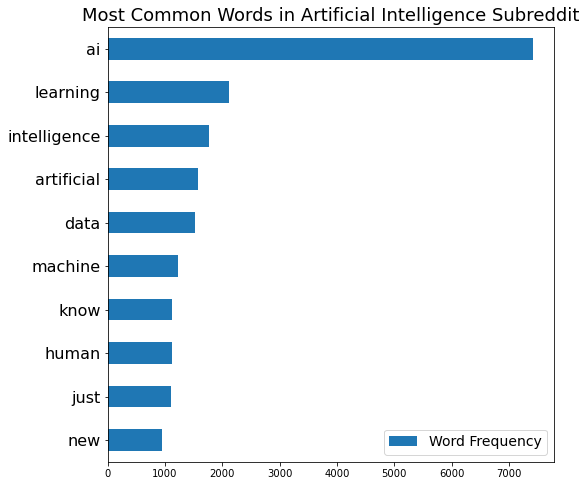

In [10]:
# Plot the most common words in AI subreddit.
top_ai_df.plot(kind = 'barh', figsize=(8,8))
plt.title('Most Common Words in Artificial Intelligence Subreddit', fontsize=18)
plt.yticks(fontsize=16)
plt.legend(labels=['Word Frequency'], fontsize=14);

## Visualize common words in the DS subreddit

In [11]:
# Import the cleaned DS data.
ds_df = pd.read_csv('../data/datascience_cleaned.csv')

In [12]:
# Instantiate CountVectorizer.
cvect_ds = CountVectorizer(stop_words=my_stop_words)

In [13]:
# Vectorize the DS text.
dsdtm = cvect_ds.fit_transform(ds_df['all_text'])

In [14]:
# Convert the sparse matrix to a dataframe.
dsdtm_df = pd.DataFrame(
    dsdtm.toarray(), 
    columns = cvect_ds.get_feature_names())

In [15]:
# Extract the top words in the DS subreddit and save to a variable.
top_ds = dsdtm_df.sum().nlargest(10)

In [16]:
# Convert the series to a dataframe, assigning a column title.
top_ds_df = top_ds.to_frame(name='word_freq')

In [17]:
# Sort the dataframe by word frequency.
top_ds_df = top_ds_df.sort_values(by='word_freq')

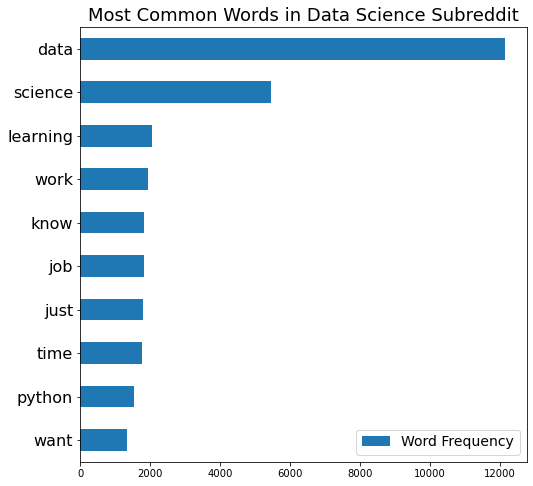

In [18]:
# Plot the most common words in DS subreddit.
top_ds_df.plot(kind = 'barh', figsize=(8,8))
plt.title('Most Common Words in Data Science Subreddit', fontsize=18)
plt.yticks(fontsize=16)
plt.legend(labels=['Word Frequency'], fontsize=14);

# Visualizing Word Overlap

In [19]:
# Save the top words to variables.
top_ai = aidtm_df.sum().nlargest(20)
top_ds = dsdtm_df.sum().nlargest(20)

In [20]:
# Convert the series to dataframes, assigning column values.
top_ai_df = top_ai.to_frame(name='word_freq')
top_ds_df = top_ds.to_frame(name='word_freq')

In [21]:
# Set the index to the words.
top_ai_df['word'] = top_ai_df.index
top_ds_df['word'] = top_ds_df.index

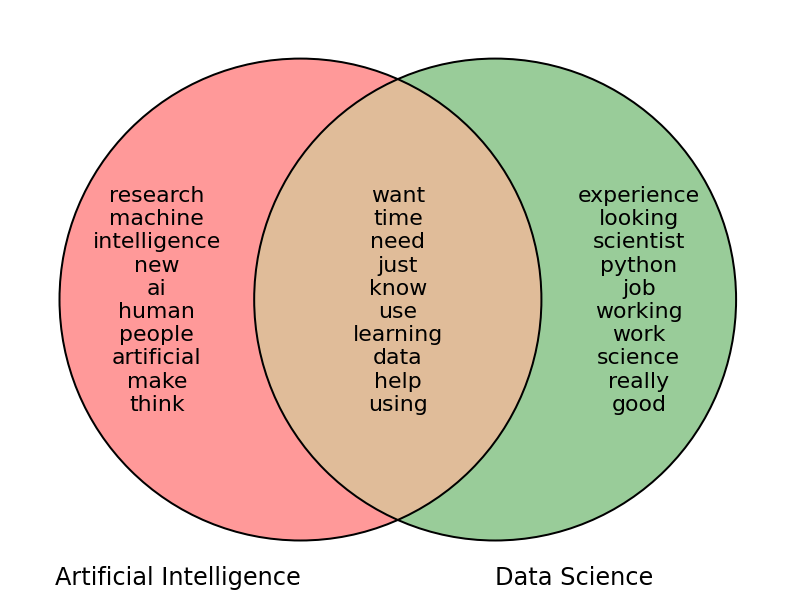

In [22]:
# https://towardsdatascience.com/venn-diagrams-and-word-clouds-in-python-1012373b38ed
# https://stackoverflow.com/questions/55622820/python-venn-diagram-actual-label

set_ai = set(top_ai_df['word'])
set_ds = set(top_ds_df['word'])

plt.figure(figsize=(14,12))

# Create a venn diagram of the two word sets.
v = venn2([set_ai, set_ds], set_labels=['Artificial Intelligence', 'Data Science'])

# Assign the word label positions with 1's and 0's 
# and content with set unions and intersections.
v.get_label_by_id('10').set_text('\n'.join(map(str,set_ai - set_ds)))
v.get_label_by_id('11').set_text('\n'.join(map(str,set_ai & set_ds)))
v.get_label_by_id('01').set_text('\n'.join(map(str,set_ds - set_ai)))

# Adjust the fontsize for the set and subset labels.
for text in v.set_labels:
    text.set_fontsize(24)
for text in v.subset_labels:
    text.set_fontsize(22)

# Add circle outlines to the venn diagram circles.
c = venn2_circles([
    set(top_ai_df['word']), 
    set(top_ds_df['word'])],
    linestyle='solid')

## Calculate overlap

In [23]:
# Save series of the top 1000 words to variables.
top_ai = aidtm_df.sum().nlargest(1000)
top_ds = dsdtm_df.sum().nlargest(1000)

In [24]:
# Convert the series to dataframes.
top_ai_df = top_ai.to_frame(name='word_freq')
top_ds_df = top_ds.to_frame(name='word_freq')

In [25]:
# Set the index to the words.
top_ai_df['word'] = top_ai_df.index
top_ds_df['word'] = top_ds_df.index

In [26]:
# Create sets of each word grouping.
set_ai = set(top_ai_df['word'])
set_ds = set(top_ds_df['word'])

In [27]:
# Calculate the length of the intersection of the word sets
# divided by the length of each word set and save to a variable.
percentage = (len(set_ds & set_ai) / len(set_ds)) * 100

print(f'There is a {percentage}% overlap between words in the AI and DS subreddits.')

There is a 68.2% overlap between words in the AI and DS subreddits.
